**CASE 2: Boundary Value Problems: 1D Poisson equation, a BVP**

**4. Solve the boundary value problem with the matlab built-in solver bvp4c. For this solver, you need to write the second-order ODE as a system of first-order ODEs. Investigate the influence of the boundary potential values and the value of the proportionality constant k'.**

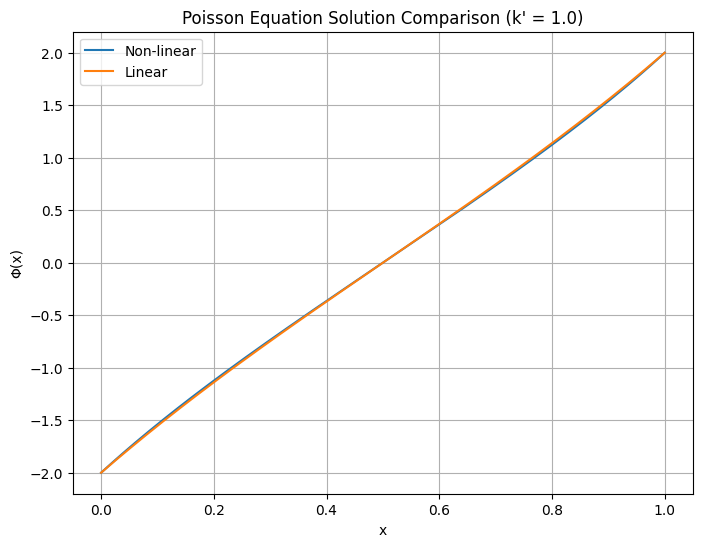

In [9]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

# Non-linear ODE: d²Φ/dx² = 2k' * sinh(Φ)
def ode_nonlinear(x, y, k_prime):
    return np.vstack((y[1], 2 * k_prime * np.sinh(y[0])))

# Linear ODE (approximation): d²Φ/dx² = 2k' * Φ
def ode_linear(x, y, k_prime):
    return np.vstack((y[1], 2 * k_prime * y[0]))

# Boundary conditions
def boundary_conditions(ya, yb, phi0, phi1):
    return np.array([ya[0] - phi0, yb[0] - phi1])

# Parameters
phi0 = -2.0   # Φ at x = 0
phi1 = 2.0   # Φ at x = 1
k_prime = 1.0

# Mesh and initial guess
x = np.linspace(0, 1, 100)
y_initial = np.zeros((2, x.size))
y_initial[0] = phi0 + (phi1 - phi0) * x  # linear initial guess

# Solve non-linear version
sol_nl = solve_bvp(
    lambda x, y: ode_nonlinear(x, y, k_prime),
    lambda ya, yb: boundary_conditions(ya, yb, phi0, phi1),
    x,
    y_initial
)

# Solve linear version
sol_lin = solve_bvp(
    lambda x, y: ode_linear(x, y, k_prime),
    lambda ya, yb: boundary_conditions(ya, yb, phi0, phi1),
    x,
    y_initial
)

# Plot both
x_plot = np.linspace(0, 1, 200)
plt.figure(figsize=(8, 6))

if sol_nl.success:
    plt.plot(x_plot, sol_nl.sol(x_plot)[0], label="Non-linear")
else:
    print("Non-linear solver did not converge.")

if sol_lin.success:
    plt.plot(x_plot, sol_lin.sol(x_plot)[0], label="Linear")
else:
    print("Linear solver did not converge.")

plt.xlabel('x')
plt.ylabel('Φ(x)')
plt.title(f'Poisson Equation Solution Comparison (k\' = {k_prime})')
plt.legend()
plt.grid(True)
plt.show()


**4. Solve the boundary value problem with the matlab built-in solver bvp4c. For this solver, you need to write the second-order ODE as a system of first-order ODEs. Investigate the influence of the boundary potential values and the value of the proportionality constant k'.**

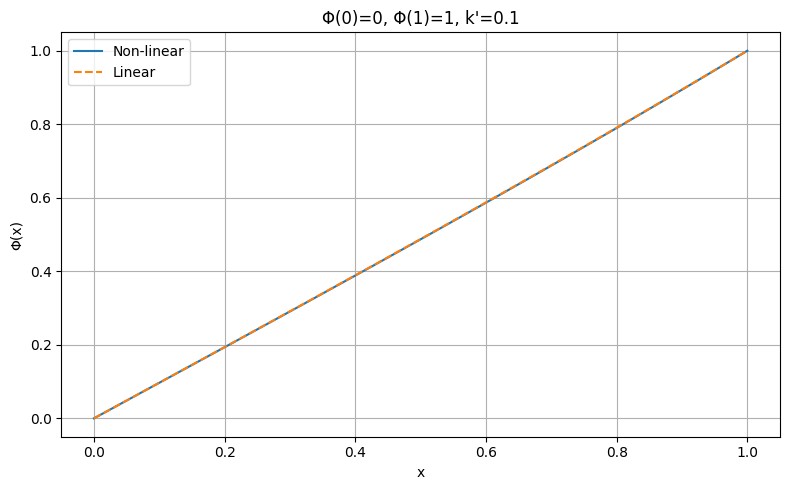

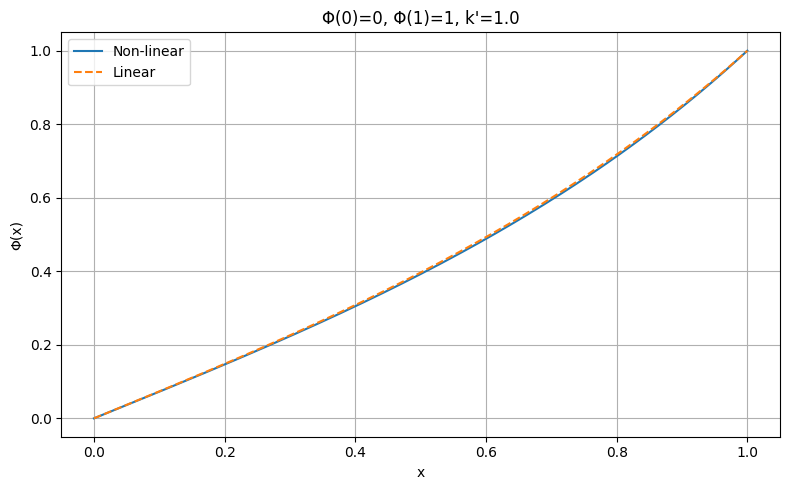

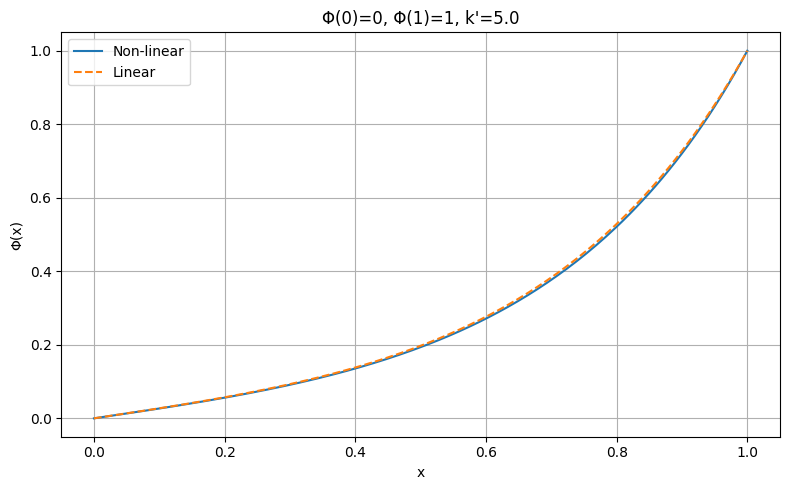

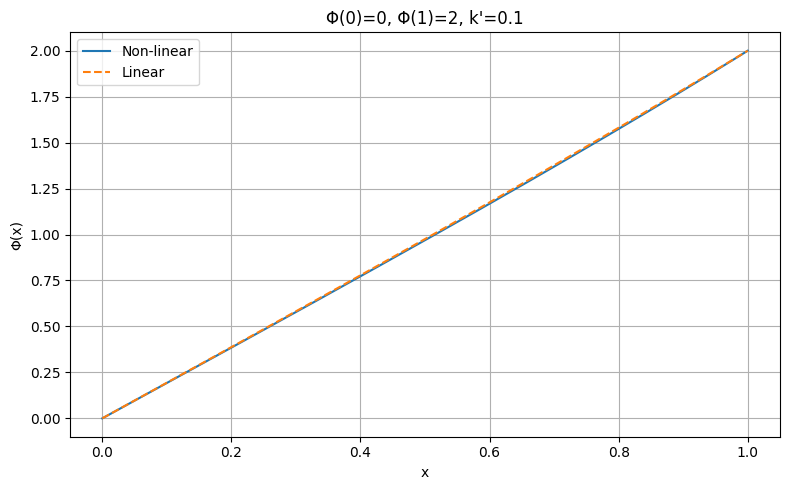

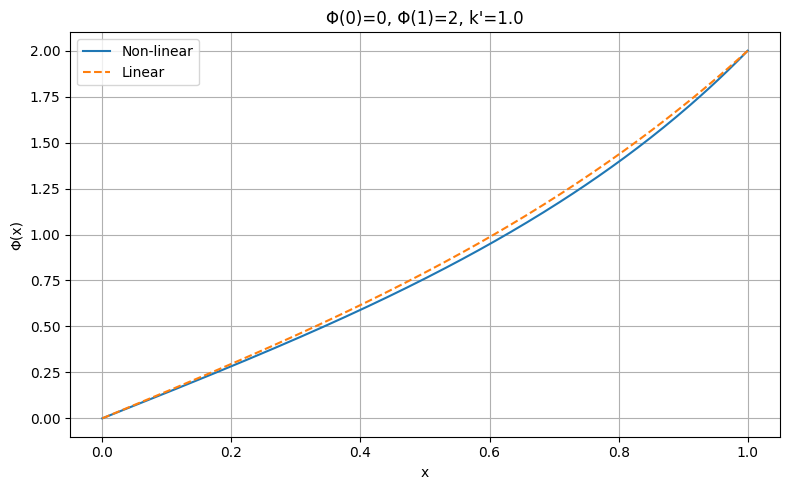

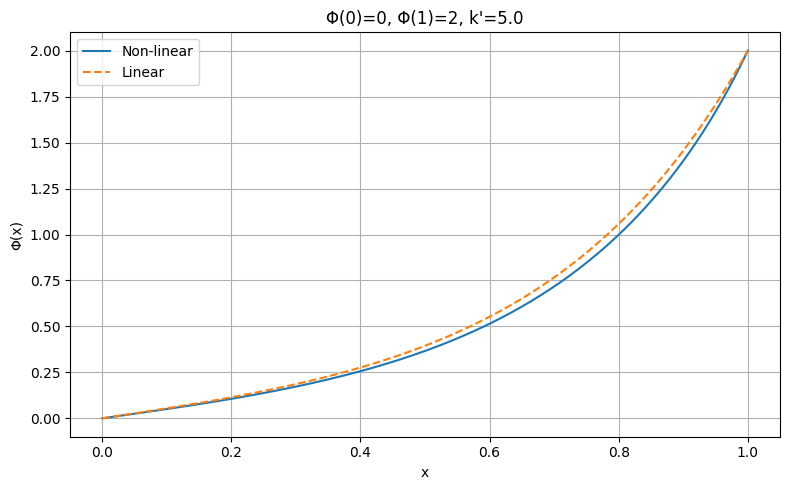

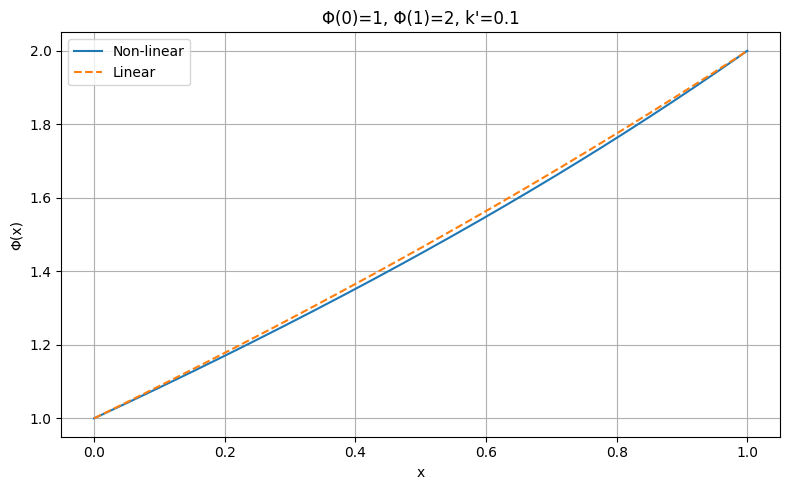

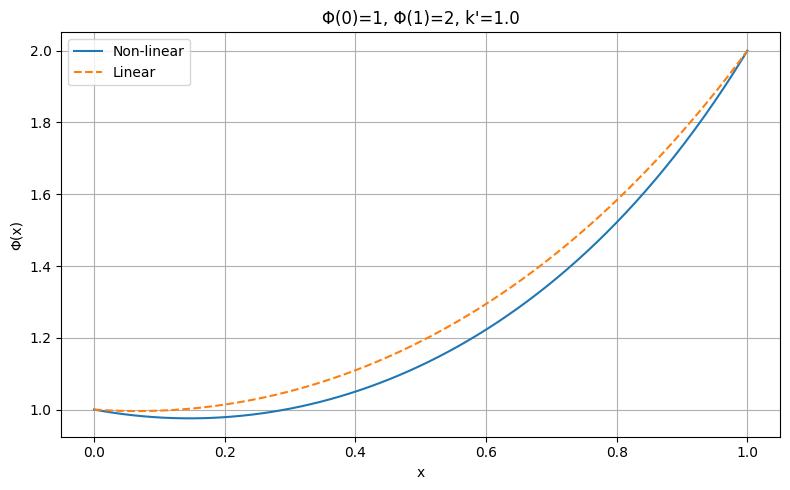

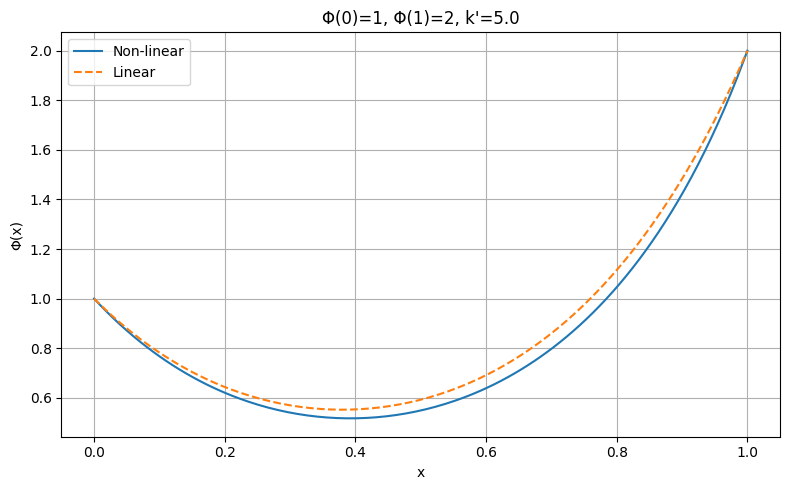

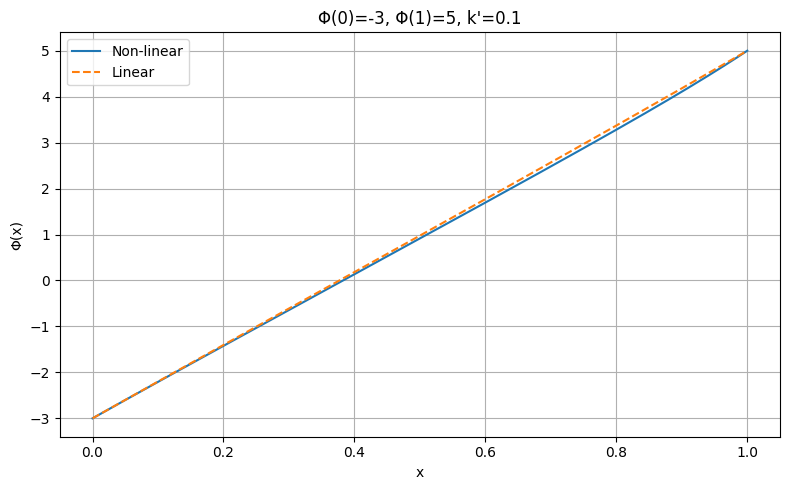

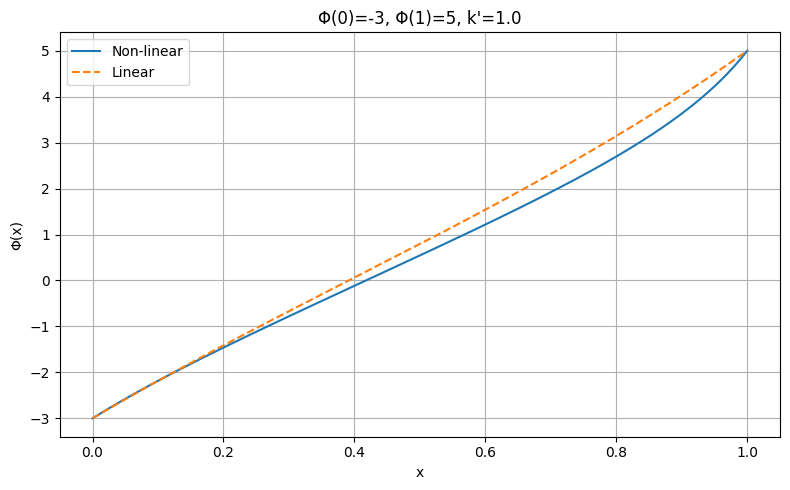

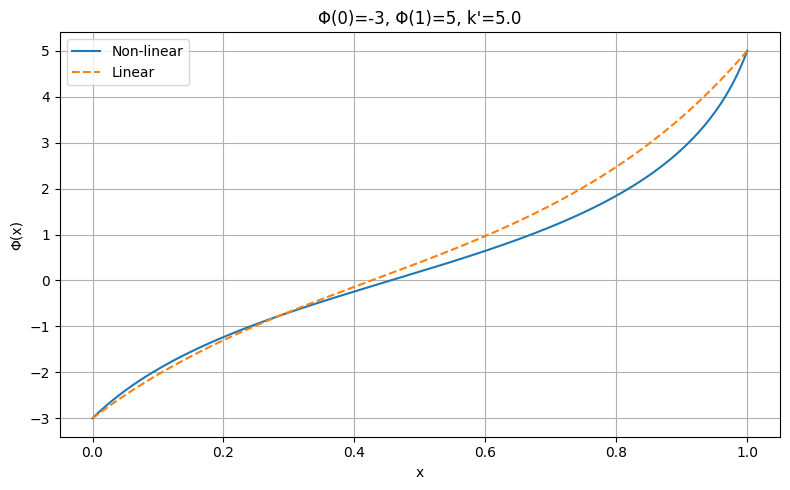

In [2]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

# ODE systems
def ode_nonlinear(x, y, k_prime):
    return np.vstack((y[1], 2 * k_prime * np.sinh(y[0])))

def ode_linear(x, y, k_prime):
    return np.vstack((y[1], 2 * k_prime * y[0]))

# Boundary conditions
def boundary_conditions(ya, yb, phi0, phi1):
    return np.array([ya[0] - phi0, yb[0] - phi1])

# Solver function
def solve_both(x, y_initial, k_prime, phi0, phi1):
    sol_nl = solve_bvp(
        lambda x, y: ode_nonlinear(x, y, k_prime),
        lambda ya, yb: boundary_conditions(ya, yb, phi0, phi1),
        x,
        y_initial
    )

    sol_lin = solve_bvp(
        lambda x, y: ode_linear(x, y, k_prime),
        lambda ya, yb: boundary_conditions(ya, yb, phi0, phi1),
        x,
        y_initial
    )

    return sol_nl, sol_lin

# Parameters to vary
k_prime_values = [0.1, 1.0, 5.0]
boundary_conditions_list = [(0, 1), (0, 2), (1, 2), (-3, 5)]

# Main loop
x = np.linspace(0, 1, 100)
x_plot = np.linspace(0, 1, 200)

for phi0, phi1 in boundary_conditions_list:
    y_initial = np.zeros((2, x.size))
    y_initial[0] = phi0 + (phi1 - phi0) * x

    for k_prime in k_prime_values:
        sol_nl, sol_lin = solve_both(x, y_initial, k_prime, phi0, phi1)

        plt.figure(figsize=(8, 5))
        if sol_nl.success:
            plt.plot(x_plot, sol_nl.sol(x_plot)[0], label="Non-linear", linestyle='-')
        else:
            print(f"Non-linear solver failed for k'={k_prime}, Φ(0)={phi0}, Φ(1)={phi1}")

        if sol_lin.success:
            plt.plot(x_plot, sol_lin.sol(x_plot)[0], label="Linear", linestyle='--')
        else:
            print(f"Linear solver failed for k'={k_prime}, Φ(0)={phi0}, Φ(1)={phi1}")

        plt.title(f"Φ(0)={phi0}, Φ(1)={phi1}, k'={k_prime}")
        plt.xlabel("x")
        plt.ylabel("Φ(x)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


**5.	The discretized equation for the interior grid points can be presented by vec. A . vec. c = vec. b  . Generate the matrix and solve the Poisson equation by the direct method. Analyze the differences between the direct method and the build-in method.**

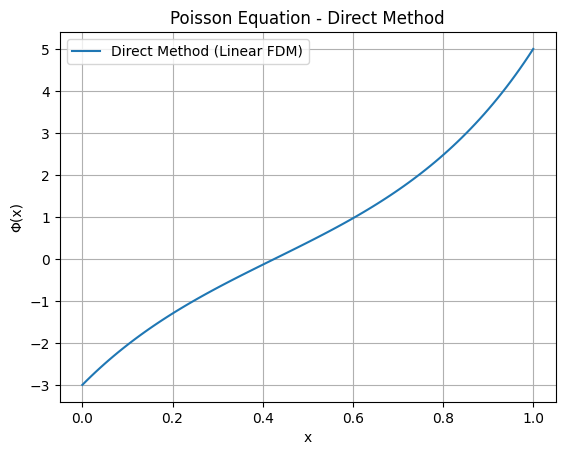

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k_prime = 5.0
phi0 = -3
phi1 = 5
N = 100  # Number of interior points
L = 1.0
h = L / (N + 1)

# Grid points
x = np.linspace(0, L, N + 2)

# Setup matrix A and right-hand side B
A = np.zeros((N, N))
B = np.zeros(N)

for i in range(N):
    A[i, i] = 2 + 2 * k_prime * h**2
    if i > 0:
        A[i, i - 1] = -1
    if i < N - 1:
        A[i, i + 1] = -1

# Boundary conditions
B[0] += phi0
B[-1] += phi1

# Solve system
phi_inner = np.linalg.solve(A, B)

# Full solution including boundaries
phi = np.concatenate(([phi0], phi_inner, [phi1]))

# Plot
plt.plot(x, phi, label='Direct Method (Linear FDM)')
plt.xlabel('x')
plt.ylabel('Φ(x)')
plt.title('Poisson Equation - Direct Method')
plt.grid(True)
plt.legend()
plt.show()


**6.	Use the shooting method to solve the Poisson equation. First, try this with the linear ODE form, then with the non-linear form.**

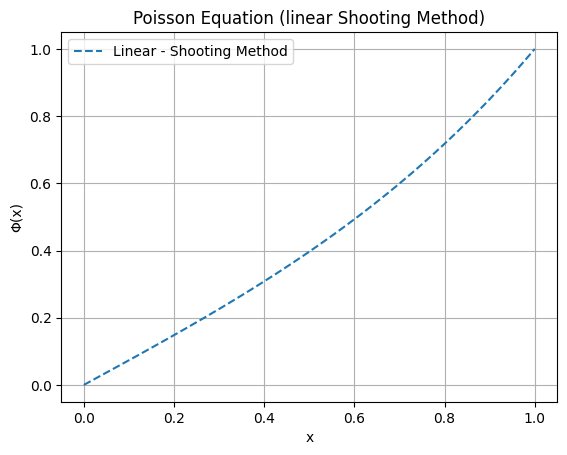

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# Parameters
k_prime = 1.0
phi0 = 0.0
phi1 = 1.0

# Define the linear ODE system
def linear_system(x, y):
    return [y[1], 2 * k_prime * y[0]]

# Shooting function: returns difference from desired boundary
def shoot_linear(s):
    sol = solve_ivp(linear_system, [0, 1], [phi0, s], t_eval=[1])
    return sol.y[0, -1] - phi1

# Find correct slope using root-finding
result = root_scalar(shoot_linear, bracket=[-10, 10], method='brentq')
s_linear = result.root

# Solve with correct slope
sol_linear = solve_ivp(linear_system, [0, 1], [phi0, s_linear], t_eval=np.linspace(0, 1, 200))

# Plot with grid
plt.plot(sol_linear.t, sol_linear.y[0], label='Linear - Shooting Method', linestyle='--')
plt.xlabel('x')
plt.ylabel('Φ(x)')
plt.title("Poisson Equation (linear Shooting Method)")
plt.grid(True)  # Add grid lines
plt.legend()
plt.show()


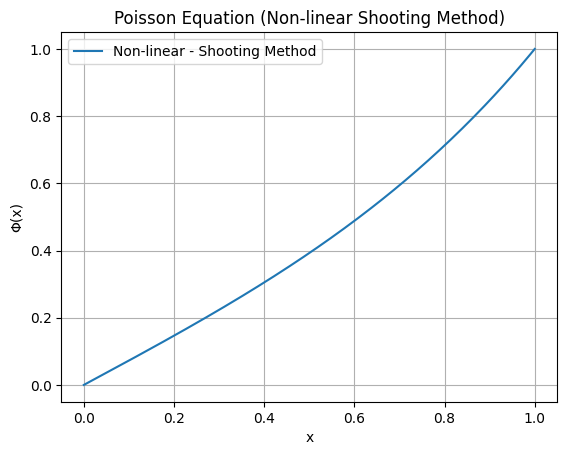

In [5]:
###Poisson equation, first for the nonlinear

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

# Parameters
k_prime = 1.0
phi0 = 0.0
phi1 = 1.0

# Non-linear ODE system
def nonlinear_system(x, y):
    return [y[1], 2 * k_prime * np.sinh(y[0])]

# Shooting function
def shoot_nonlinear(s):
    sol = solve_ivp(nonlinear_system, [0, 1], [phi0, s])
    return sol.y[0, -1] - phi1  # Get Φ at x = 1

# Find initial slope using root-finding
result_nl = root_scalar(shoot_nonlinear, bracket=[-10, 10], method='brentq')
s_nonlinear = result_nl.root

# Final integration with found slope
sol_nonlinear = solve_ivp(nonlinear_system, [0, 1], [phi0, s_nonlinear], t_eval=np.linspace(0, 1, 200))

# Plot
plt.plot(sol_nonlinear.t, sol_nonlinear.y[0], label="Non-linear - Shooting Method")
plt.xlabel('x')
plt.ylabel('Φ(x)')
plt.title("Poisson Equation (Non-linear Shooting Method)")
plt.legend()
plt.grid(True)
plt.show()



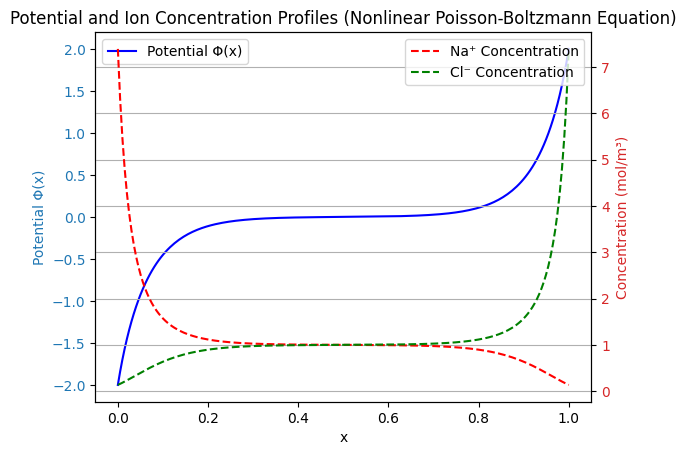

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

# Parameters
k_prime = 100.0        # Proportionality constant
phi0 = -2.0          # Potential at x=0 (left electrode)
phi1 = 2.0           # Potential at x=1 (right electrode)
c0 = 1.0             # Initial NaCl concentration (mol/m^3)

# Define the ODE system for the nonlinear Poisson-Boltzmann equation
def ode_system(x, y):
    return np.vstack((y[1], 2 * k_prime * np.sinh(y[0])))

# Define boundary conditions
def boundary_conditions(ya, yb):
    return np.array([ya[0] - phi0, yb[0] - phi1])

# Initial mesh and guess
x = np.linspace(0, 1, 100)
y_init = np.zeros((2, x.size))
y_init[0] = phi0 + (phi1 - phi0) * x  # Linear initial guess for potential

# Solve BVP
sol = solve_bvp(ode_system, boundary_conditions, x, y_init)

# Check if solution succeeded
if sol.success:
    x_vals = np.linspace(0, 1, 200)
    phi = sol.sol(x_vals)[0]
    cation = c0 * np.exp(-phi)  # Na⁺ concentration
    anion = c0 * np.exp(phi)    # Cl⁻ concentration

    # Plot potential and concentrations
    fig, ax1 = plt.subplots()

    ax1.set_xlabel('x')
    ax1.set_ylabel('Potential Φ(x)', color='tab:blue')
    ax1.plot(x_vals, phi, 'b-', label='Potential Φ(x)')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Concentration (mol/m³)', color='tab:red')
    ax2.plot(x_vals, cation, 'r--', label='Na⁺ Concentration')
    ax2.plot(x_vals, anion, 'g--', label='Cl⁻ Concentration')
    ax2.tick_params(axis='y', labelcolor='tab:red')
    ax2.legend(loc='upper right')

    plt.title('Potential and Ion Concentration Profiles (Nonlinear Poisson-Boltzmann Equation)')
    plt.grid(True)
    plt.show()
else:
    print("The BVP solver did not converge.")
